# Nearest Neighbors

## Import and Settings

In [2]:
import dask
import dask.dataframe as dd
import dask.array as da

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import itertools

from joblib import dump, load

In [3]:
df = dd.read_csv('prepared_ds.csv')

## Initialise Sample Dataframe

In [3]:
df_fast = df.sample(frac=0.01, random_state = 1).compute()

## Train-Test-Split

In [4]:
train, test, train_lbl, test_lbl = train_test_split(df_fast[df_fast.columns[1:-1]], df_fast['Label'], 
                                                    test_size=0.2, random_state=1)

## Training
### Models created with different parameters (grid search)

In [ ]:
algo_options = ["auto", "ball_tree", "kd_tree", "brute"]
weight_options = ["uniform", "distance"]

scores = []
options = list(itertools.product(algo_options, weight_options, range(1,5)))
n = len(options)

for i, (algo_option, weight_option, neighbours) in enumerate(options):
    neigh = KNeighborsClassifier(n_neighbors=neighbours, weights=weight_option, algorithm=algo_option)        
    neigh.fit(train, train_lbl)
    score = neigh.score(test, test_lbl)
    scores.append([score, neighbours, weight_option, algo_option])
    print('[' + (i+1) * '=' + '>' + (n-i-1) * ' ' + ']' + '\t\t' + f'{i+1}/{n}', end='\r')
    
scores.sort(reverse=True)
scores #die 0, 7 optionen für das Trainieren des großen Datensatzes verwenden

### Train 2 models on whole dataset

In [10]:
[x for x in enumerate(scores)]

[(0, [0.9984137475214805, 2, 'distance', 'kd_tree']),
 (1, [0.9984137475214805, 2, 'distance', 'brute']),
 (2, [0.9984137475214805, 2, 'distance', 'ball_tree']),
 (3, [0.9984137475214805, 2, 'distance', 'auto']),
 (4, [0.9984137475214805, 1, 'uniform', 'kd_tree']),
 (5, [0.9984137475214805, 1, 'uniform', 'brute']),
 (6, [0.9984137475214805, 1, 'uniform', 'ball_tree']),
 (7, [0.9984137475214805, 1, 'uniform', 'auto']),
 (8, [0.9984137475214805, 1, 'distance', 'kd_tree']),
 (9, [0.9984137475214805, 1, 'distance', 'brute']),
 (10, [0.9984137475214805, 1, 'distance', 'ball_tree']),
 (11, [0.9984137475214805, 1, 'distance', 'auto']),
 (12, [0.9983476536682089, 4, 'distance', 'kd_tree']),
 (13, [0.9983476536682089, 4, 'distance', 'brute']),
 (14, [0.9983476536682089, 4, 'distance', 'ball_tree']),
 (15, [0.9983476536682089, 4, 'distance', 'auto']),
 (16, [0.9982154659616655, 3, 'distance', 'kd_tree']),
 (17, [0.9982154659616655, 3, 'distance', 'brute']),
 (18, [0.9982154659616655, 3, 'distanc

In [4]:
df = df.compute()
train, test, train_lbl, test_lbl = train_test_split(df[df.columns[1:-1]], df['Label'], 
                                                    test_size=0.2, random_state=1)

In [ ]:
##Model 1
neigh_distance = KNeighborsClassifier(n_neighbors=2, weights="distance", algorithm="kd_tree")        
neigh_distance.fit(train, train_lbl)
score1 = neigh_distance.score(test, test_lbl)

In [ ]:
##Model 2
neigh_uniform = KNeighborsClassifier(n_neighbors=1, weights="uniform", algorithm="ball_tree")        
neigh_uniform.fit(train, train_lbl)
score2 = neigh_uniform.score(test, test_lbl)
print(score2)

## Evaluation

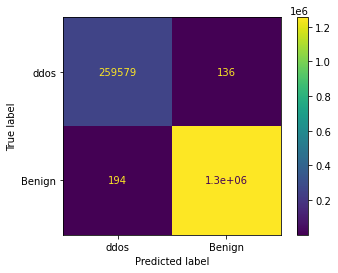

In [19]:
confusion_mtx1 = confusion_matrix(test_lbl, neigh_distance.predict(test))
np.round(confusion_mtx1/len(test_lbl), 3)
plot_confusion_matrix(neigh_distance, test, test_lbl, labels=['ddos', 'Benign'])

In [ ]:
confusion_mtx2 = confusion_matrix(test_lbl, neigh_uniform.predict(test))
np.round(confusion_mtx2/len(test_lbl), 3)
plot_confusion_matrix(neigh_uniform, test, test_lbl, labels=['ddos', 'Benign'])

In [ ]:
for i, matrix in enumerate(confusion_mtx1, confusion_mtx2):
    fig = plt.figure()
    plt.matshow(cm)
    plt.title(f'Confusion Matrix for Model {i+1}')
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicated Label')
    plt.savefig('confusion_matrix'+str(learning_values.pop())+'.jpg')

## Save Model

In [26]:
## Scores:
# Model1: 0.9997819984924865
# Model2: 0.9997833197137442

In [ ]:
dump(neigh_uniform, 'models/nn_u.joblib')
#dump(neigh_distance, 'models/nn_d.joblib')